## Analyzing Popular App Categories on Google Play Store
`In this project, our goal is to figure out what types of apps are popular on the Google Play Store. We work for a company that makes free apps and earns money through ads. By understanding what types of apps are in high demand, we can help our developers create apps that attract more users and generate more revenue. We will analyze data from the Google Play Store to identify patterns and preferences among users. This way, we can make smarter decisions about the apps we develop.`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
android_df= pd.read_csv('googleplaystore.csv')
android_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
android_df.shape

(10841, 13)

In [4]:
android_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## DATA CLEANING

### 1. Cleaning Category Column Inconsistency
`There is a column named as "1.9" that needs to be corrected`

In [5]:
android_df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [7]:
android_df[android_df["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
android_df[android_df["Category"]=="1.9"]['Category']

10472    1.9
Name: Category, dtype: object

In [9]:
android_df[android_df["Category"]=="1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [10]:
android_df[android_df['Category']=='LIFESTYLE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1562,Dollhouse Decorating Games,LIFESTYLE,4.1,18968,32M,"5,000,000+",Free,0,Teen,Lifestyle,"April 26, 2018",5.1,4.1 and up
1563,metroZONE,LIFESTYLE,4.1,47497,34M,"10,000,000+",Free,0,Everyone,Lifestyle,"June 8, 2018",5.3.0.54.7,5.0 and up
1564,Easy Hair Style Design,LIFESTYLE,4.3,601,5.1M,"100,000+",Free,0,Everyone,Lifestyle,"December 20, 2017",1.0,2.3 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100M,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1566,"Black Wallpaper, AMOLED, Dark Background: Darkify",LIFESTYLE,4.6,51357,80M,"5,000,000+",Free,0,Everyone,Lifestyle,"July 31, 2018",8.0,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,NaN,0,8.9M,10+,Free,0,Everyone,Lifestyle,"July 31, 2018",7.2.2,4.1 and up
10797,Fuel Rewards® program,LIFESTYLE,4.6,32433,46M,"1,000,000+",Free,0,Everyone,Lifestyle,"June 26, 2018",2.9.1,5.0 and up
10805,Scoreboard FR,LIFESTYLE,4.3,3,15M,100+,Free,0,Everyone,Lifestyle,"August 7, 2018",2.1,4.2 and up
10808,lesparticuliers.fr,LIFESTYLE,NaN,96,1.0M,"50,000+",Free,0,Everyone,Lifestyle,"November 25, 2014",1.5,2.3 and up


In [11]:
android_df[android_df["Category"]=="1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [12]:
android_df[android_df["Category"]=="1.9"]=['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE','1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018',
        '1.0.19', '4.0 and up']

In [13]:
android_df[android_df["Rating"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


In [14]:
android_df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

### 2. Removing Duplicate Apps
`App names are duplicated that needs to be corrected`

In [15]:
app_count=android_df['App'].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [16]:
app_count > 1

App
ROBLOX                                                 True
CBS Sports App - Scores, News, Stats & Watch Live      True
ESPN                                                   True
Duolingo: Learn Languages Free                         True
Candy Crush Saga                                       True
                                                      ...  
Meet U - Get Friends for Snapchat, Kik & Instagram    False
U-Report                                              False
U of I Community Credit Union                         False
Waiting For U Launcher Theme                          False
iHoroscope - 2018 Daily Horoscope & Astrology         False
Name: count, Length: 9660, dtype: bool

In [17]:
app_count[app_count > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [18]:
"Instagram" in app_count

True

In [19]:
app_count[app_count > 1]=='Instagram'

App
ROBLOX                                               False
CBS Sports App - Scores, News, Stats & Watch Live    False
ESPN                                                 False
Duolingo: Learn Languages Free                       False
Candy Crush Saga                                     False
                                                     ...  
Transenger – Ts Dating and Chat for Free             False
Random Video Chat                                    False
Clover Dating App                                    False
Docs To Go™ Free Office Suite                        False
English Dictionary - Offline                         False
Name: count, Length: 798, dtype: bool

In [20]:
android_df[android_df["App"]=='Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [21]:
android_df[android_df.duplicated(subset=["App"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [22]:
android_df.duplicated(subset=["App"]).value_counts()

False    9660
True     1181
Name: count, dtype: int64

In [23]:
duplicate_apps_df=android_df[android_df.duplicated(subset="App",keep=False)]
duplicate_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [24]:
duplicate_apps_df=android_df[android_df.duplicated(subset="App",keep=False)]
duplicate_apps_df[duplicate_apps_df['App']=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [25]:
duplicate_apps_df=android_df[android_df.duplicated(subset="App",keep=False)]
duplicate_apps_df[duplicate_apps_df['App']=="Instagram"].sort_values("Reviews",ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [26]:
duplicate_apps_df=android_df[android_df.duplicated(subset="App",keep=False)]
duplicate_apps_df[duplicate_apps_df['App']=="Instagram"].sort_values("Reviews",ascending=False).iloc[0]

App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577446
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2604, dtype: object

###### Another method of fixing duplicates using group by

In [27]:
android_df.groupby('App').get_group("Instagram").sort_values("Reviews",ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [28]:
reviews_max=android_df.groupby("App")["Reviews"].max()

In [29]:
reviews_max["Instagram"]

'66577446'

In [30]:
reviews_max["Facebook"]

'78158306'

In [31]:
android_clean=[]

for index,row in android_df.iterrows():
    name=row["App"]
    n_reviews=row["Reviews"]
    if reviews_max[name] == n_reviews:
        android_clean.append(row)
len(android_clean)

10056

In [32]:
android_clean=[]
already_added=[]

for index,row in android_df.iterrows():
    name=row["App"]
    n_reviews=row["Reviews"]
    if reviews_max[name] == n_reviews and (name not in already_added):
        android_clean.append(row)
        already_added.append(name)
"Instagram" in already_added

True

In [33]:
len(android_clean)

9660

In [34]:
android_clean=pd.DataFrame(android_clean)
android_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 3. Removing Non-English Apps
`Our analysis is based on English Apps only, so we will remove all Non-English Apps`

In [35]:
ord('A')

65

In [36]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    return lst

In [37]:
is_english("Facebook 😅")

[True, True, True, True, True, True, True, True, True, False]

In [38]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    check = set(lst)
    return check

In [39]:
is_english("Facebook 😅")

{False, True}

In [40]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    check=set(lst)
    
    if False in check:
        return False
    else:
        return True

In [41]:
is_english("Facebook 😅😂🤣")

False

In [42]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    non_ascii=0
    for j in lst:
        if j == False:
            non_ascii += 1
            
    if non_ascii > 3:
        return False
    else:
        return True

In [43]:
is_english("Facebook 😅😂🤣")

True

In [44]:
android_clean['App'].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [45]:
android_english=android_clean[android_clean['App'].apply(is_english)]
android_english

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 4. Removing Paid Apps
`As mentioned earlier, we build free apps so our analysis will be based on free apps. Now, we will remove paid apps.`

In [46]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [47]:
android_english["Price"]=="0"

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Price, Length: 9615, dtype: bool

In [48]:
android_final=android_english[android_english["Price"]=="0"]
android_final

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## DATA ANALYSIS

### 1. Most Common Apps by Genre
`We will first analyze which apps are most commonly built in terms of Genre`

In [49]:
android_final["Category"].value_counts()

Category
FAMILY                 1678
GAME                    859
TOOLS                   749
BUSINESS                407
LIFESTYLE               347
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 312
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               104
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: count, dtype: int64

In [50]:
android_final["Category"].value_counts(normalize=True) # normalize:bool,default False-> Return proportions rather than frequencies

Category
FAMILY                 0.189326
GAME                   0.096920
TOOLS                  0.084509
BUSINESS               0.045921
LIFESTYLE              0.039152
PRODUCTIVITY           0.038926
FINANCE                0.037008
MEDICAL                0.035203
SPORTS                 0.033961
PERSONALIZATION        0.033172
COMMUNICATION          0.032382
HEALTH_AND_FITNESS     0.030802
PHOTOGRAPHY            0.029448
NEWS_AND_MAGAZINES     0.027981
SOCIAL                 0.026628
TRAVEL_AND_LOCAL       0.023356
SHOPPING               0.022453
BOOKS_AND_REFERENCE    0.021437
DATING                 0.018617
VIDEO_PLAYERS          0.017940
MAPS_AND_NAVIGATION    0.013991
FOOD_AND_DRINK         0.012411
EDUCATION              0.011734
ENTERTAINMENT          0.009590
LIBRARIES_AND_DEMO     0.009365
AUTO_AND_VEHICLES      0.009252
HOUSE_AND_HOME         0.008236
WEATHER                0.008011
EVENTS                 0.007108
PARENTING              0.006544
ART_AND_DESIGN         0.006431

In [51]:
android_final["Category"].value_counts(normalize=True).sum()

1.0

In [52]:
android_final["Category"].value_counts(normalize=True)*100

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

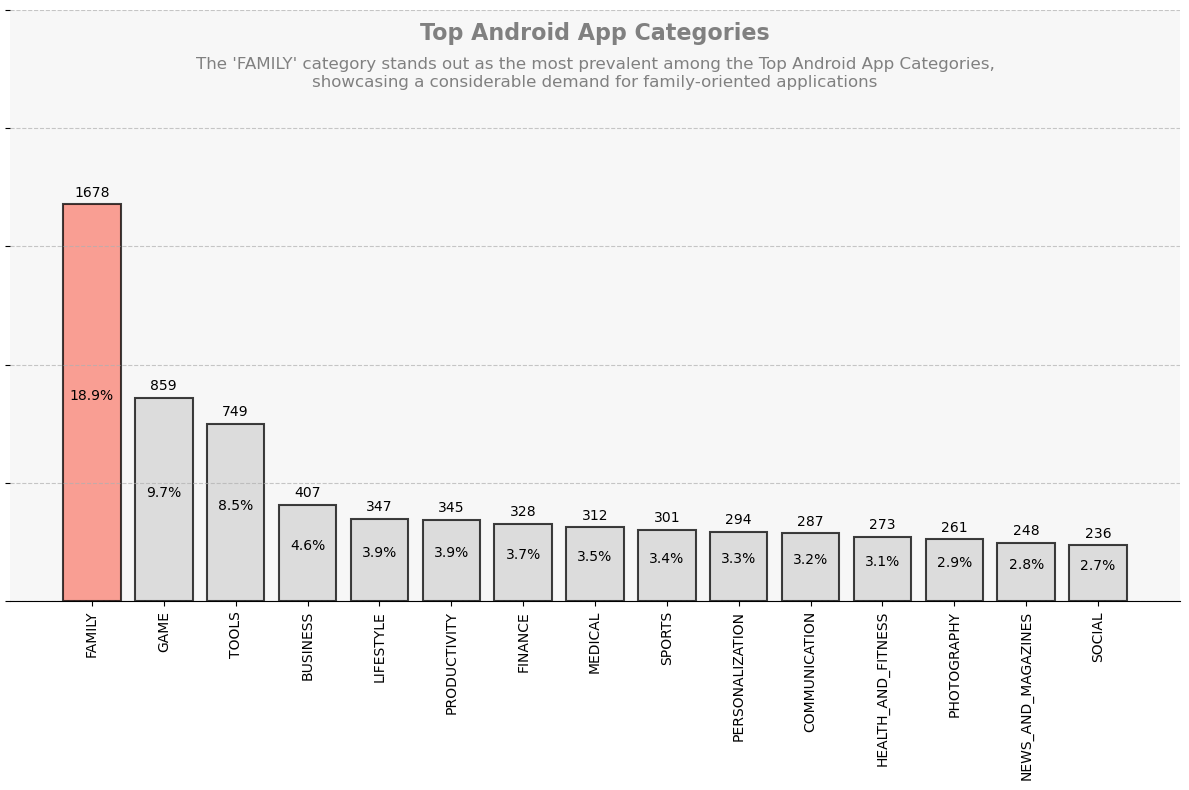

In [53]:
# Data
categories=android_final['Category'].value_counts().index[:15]
counts=android_final['Category'].value_counts().values[:15]
percentage=round(android_final["Category"].value_counts(normalize=True)*100,1)[:15]

# Create stylish bar chart
plt.figure(figsize=(12,8))
bars=plt.bar(categories,counts,color='lightgray',alpha=0.75,edgecolor='black',linewidth=1.5)
plt.xticks(rotation=90,fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.grid(axis='x',linestyle="")
plt.yticks(range(0,3000,500),[],fontsize=10)

# Find the category with the highest count
max_count_category=categories[counts.argmax()]
max_count_category

# Highlight the bar for the category with the highest count
max_count_index=list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages in each bar
for bar,perc in zip(bars,percentage):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20, "%d" % int(height),ha='center',va="bottom",fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{perc}%", ha="center", va="bottom", fontsize=10, color="black")
    
# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# plt.gca().set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5,0.95,"Top Android App Categories",ha='center',fontsize=16,transform=plt.gca().transAxes,color='gray'\
        ,fontweight='bold')

# Adding conclusion inside the chart
plt.text(0.5,0.87,"The 'FAMILY' category stands out as the most prevalent among the Top Android App Categories,\
\nshowcasing a considerable demand for family-oriented applications",horizontalalignment='center',fontsize=12,\
         transform=plt.gca().transAxes,color='gray',fontweight='regular')

# Remove Spines
for i in ["right","left","top"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() # Adjust layout to prevent clipping
    
plt.show()

### 2. Most Popular Apps by Genre

`Now we will analyze which apps have highest popularity in terms of app downloads/installations.`

In [54]:
android_final["Installs"].value_counts()

Installs
1,000,000+        1395
100,000+          1024
10,000,000+        932
10,000+            904
1,000+             745
100+               613
5,000,000+         606
500,000+           494
50,000+            423
5,000+             400
10+                314
500+               288
50,000,000+        203
100,000,000+       188
50+                170
5+                  70
1+                  45
500,000,000+        24
1,000,000,000+      20
0+                   4
0                    1
Name: count, dtype: int64

In [55]:
android_final["Installs"].value_counts(normalize=True)

Installs
1,000,000+        0.157396
100,000+          0.115537
10,000,000+       0.105156
10,000+           0.101997
1,000+            0.084057
100+              0.069164
5,000,000+        0.068374
500,000+          0.055737
50,000+           0.047727
5,000+            0.045131
10+               0.035428
500+              0.032495
50,000,000+       0.022904
100,000,000+      0.021212
50+               0.019181
5+                0.007898
1+                0.005077
500,000,000+      0.002708
1,000,000,000+    0.002257
0+                0.000451
0                 0.000113
Name: proportion, dtype: float64

In [56]:
android_final["Installs"].value_counts(normalize=True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [57]:
android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 8863, dtype: int32

In [58]:
android_final["Installs_int"]=android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)
android_final.head()

C:\Users\Muhammad Shabahat\AppData\Local\Temp\ipykernel_12504\685552843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"]=android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,50000


In [59]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq

Installs_int
0                5
1               45
5               70
10             314
50             170
100            613
500            288
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [60]:
install_frq.index

Index([         0,          1,          5,         10,         50,        100,
              500,       1000,       5000,      10000,      50000,     100000,
           500000,    1000000,    5000000,   10000000,   50000000,  100000000,
        500000000, 1000000000],
      dtype='int32', name='Installs_int')

In [61]:
install_frq=install_frq[install_frq.index >= 1000] # we will ignore the installation counts less than 1000
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [62]:
install_frq_per=round(android_final["Installs_int"].value_counts(normalize=True)*100,2).sort_index(ascending=True)
install_frq_per

Installs_int
0              0.06
1              0.51
5              0.79
10             3.54
50             1.92
100            6.92
500            3.25
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [63]:
install_frq_per=install_frq_per[install_frq_per.index >= 1000]
install_frq_per.sort_index()

Installs_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [64]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f"{value/1e9:.0f}B"
    elif value >= 1e6:
        return f"{value/1e6:.0f}M"
    elif value >= 1e3:
        return f"{value/1e3:.0f}K"
    else:
        return f"{value:.0f}"

In [65]:
alphanumeric_units(100000)

'100K'

In [66]:
install_frq.index=install_frq.index.map(alphanumeric_units)
install_frq

Installs_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

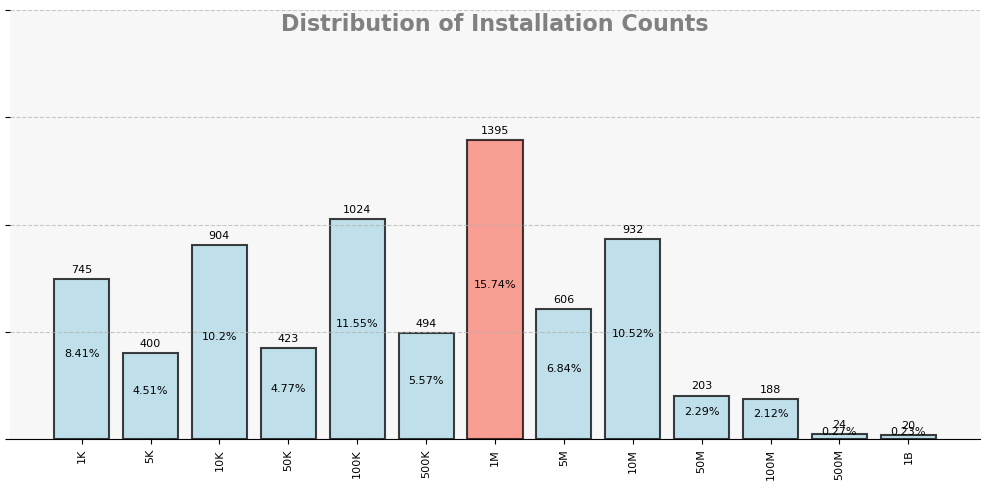

In [67]:
# Data
categories=install_frq.index
counts=install_frq.values
percentage=install_frq_per.values

# Create stylish bar chart
plt.figure(figsize=(10,5))
bars=plt.bar(categories,counts,color='lightblue',alpha=0.75,edgecolor='black',linewidth=1.5)
plt.xticks(rotation=90,fontsize=8)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.grid(axis='x',linestyle="")
plt.yticks(range(0,2500,500),[],fontsize=8)

# Find the category with the highest count
max_count_category=categories[counts.argmax()]
max_count_category

# Highlight the bar for the category with the highest count
max_count_index=list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages in each bar
for bar,perc in zip(bars,percentage):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20, "%d" % int(height),ha='center',va="bottom",fontsize=8)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{perc}%", ha="center", va="bottom", fontsize=8, color="black")
    
# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5,0.95,"Distribution of Installation Counts",ha='center',fontsize=16,transform=plt.gca().transAxes,color='gray'\
        ,fontweight='bold')

# Adding conclusion inside the chart
# plt.text(0.5,0.87,"The 'FAMILY' category stands out as the most prevalent among the Top Android App Categories,\
# \nshowcasing a considerable demand for family-oriented applications",horizontalalignment='center',fontsize=12,\
#          transform=plt.gca().transAxes,color='gray',fontweight='regular')

# Remove Spines
for i in ["right","left","top"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() # Adjust layout to prevent clipping
    
plt.show()

In [68]:
categories_android=android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [69]:
pd.pivot_table(android_final,index="Category",values="Installs_int",aggfunc=["count","sum","mean"])

,count,sum,mean
,Installs_int,Installs_int,Installs_int
Category,,,
ART_AND_DESIGN,57,113221100,1.986335e+06
AUTO_AND_VEHICLES,82,53080061,6.473178e+05
BEAUTY,53,27197050,5.131519e+05
BOOKS_AND_REFERENCE,190,1665884260,8.767812e+06
BUSINESS,407,696902090,1.712290e+06
COMICS,55,44971150,8.176573e+05
COMMUNICATION,287,11036906201,3.845612e+07
DATING,165,140914757,8.540288e+05


In [70]:
# display DataFrame without scietific notation
pd.options.display.float_format= "{:.0f}".format

In [71]:
categories_installs=pd.pivot_table(android_final,index="Category",values="Installs_int",aggfunc="mean")
categories_installs=categories_installs.sort_values(by="Installs_int",ascending=False)
categories_installs # it shows result in form of DataFrame

,Installs_int
Category,
COMMUNICATION,38456119
VIDEO_PLAYERS,24727872
SOCIAL,23253652
PHOTOGRAPHY,17805628
PRODUCTIVITY,16787331
GAME,15560966
TRAVEL_AND_LOCAL,13984078
ENTERTAINMENT,11640706
TOOLS,10682301


In [72]:
categories_installs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, COMMUNICATION to MEDICAL
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Installs_int  33 non-null     float64
dtypes: float64(1)
memory usage: 528.0+ bytes


In [73]:
categories_installs=categories_installs["Installs_int"]
categories_installs # now it shows result in form of Series

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [74]:
categories_installs.info()

<class 'pandas.core.series.Series'>
Index: 33 entries, COMMUNICATION to MEDICAL
Series name: Installs_int
Non-Null Count  Dtype  
--------------  -----  
33 non-null     float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [75]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f"{value/1e9:.1f}B"
    elif value >= 1e6:
        return f"{value/1e6:.1f}M"
    elif value >= 1e3:
        return f"{value/1e3:.1f}K"
    else:
        return f"{value:.1f}"

In [76]:
categories_installs_units=categories_installs.apply(alphanumeric_units)
categories_installs_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

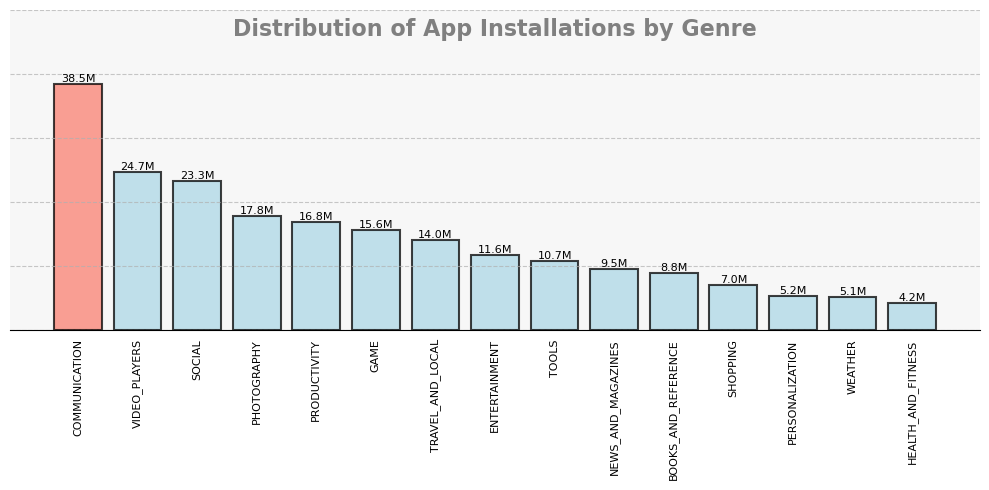

In [77]:
# Data
categories=categories_installs.index[:15]
counts=categories_installs.values[:15]
# percentage=install_frq_per.values

# Create stylish bar chart
plt.figure(figsize=(10,5))
bars=plt.bar(categories,counts,color='lightblue',alpha=0.75,edgecolor='black',linewidth=1.5)
plt.xticks(rotation=90,fontsize=8)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.grid(axis='x',linestyle="")
plt.yticks(range(0,60000000,10000000),[],fontsize=8)
plt.tick_params(bottom=0,left=0)

# Find the category with the highest count
max_count_category=categories[counts.argmax()]
max_count_category

# Highlight the bar for the category with the highest count
max_count_index=list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages in each bar
for bar,units in zip(bars,categories_installs_units.values):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20,units, ha='center',va="bottom",fontsize=8)
#     plt.text(bar.get_x() + bar.get_width()/2, height/2, f"{perc}%", ha="center", va="bottom", fontsize=8, color="black")
    
# Adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5,0.92,"Distribution of App Installations by Genre",ha='center',fontsize=16,transform=plt.gca().transAxes,color='gray'\
        ,fontweight='bold')

# Adding conclusion inside the chart
# plt.text(0.5,0.87,"The 'FAMILY' category stands out as the most prevalent among the Top Android App Categories,\
# \nshowcasing a considerable demand for family-oriented applications",horizontalalignment='center',fontsize=12,\
#          transform=plt.gca().transAxes,color='gray',fontweight='regular')

# Remove Spines
for i in ["right","left","top"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() # Adjust layout to prevent clipping
    
plt.show()

## 3. Competition Analysis in Most Popular Genre Categories
`We will analyze top 15 apps in each of the top 15 most popular genre categories to find out in which category we have a higher chance of reaching our target of 1 Million+ Installations to attract more ads for higher revenue.`

In [78]:
categories_installs.index

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS',
       'MAPS_AND_NAVIGATION', 'FAMILY', 'SPORTS', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'EDUCATION', 'BUSINESS', 'LIFESTYLE', 'FINANCE',
       'HOUSE_AND_HOME', 'DATING', 'COMICS', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'PARENTING', 'BEAUTY', 'EVENTS', 'MEDICAL'],
      dtype='object', name='Category')

In [79]:
top15_categories=categories_installs.index[:15]
top15_categories

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [80]:
category_group=android_final.groupby("Category")
category_group

In [81]:
def top15_apps(category_name):
    cat=category_group.get_group(category_name).sort_values("Installs_int",ascending=False)
    df=cat[['App','Installs_int']].head(20)
    df["Installs_int_unit"]=df["Installs_int"].apply(alphanumeric_units)
    return df

In [82]:
top15_apps("COMMUNICATION")

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1.0B
382,Messenger – Text and Video Chat for Free,1000000000,1.0B
464,Hangouts,1000000000,1.0B
411,Google Chrome: Fast & Secure,1000000000,1.0B
391,Skype - free IM & video calls,1000000000,1.0B
451,Gmail,1000000000,1.0B
403,LINE: Free Calls & Messages,500000000,500.0M
4676,Viber Messenger,500000000,500.0M
420,UC Browser - Fast Download Private & Secure,500000000,500.0M
371,Google Duo - High Quality Video Calls,500000000,500.0M


In [83]:
top15_apps("VIDEO_PLAYERS")

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1.0B
3687,Google Play Movies & TV,1000000000,1.0B
3711,MX Player,500000000,500.0M
3675,VLC for Android,100000000,100.0M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100.0M
4032,Dubsmash,100000000,100.0M
10647,Motorola FM Radio,100000000,100.0M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100.0M
3672,Motorola Gallery,100000000,100.0M
3691,Samsung Video Library,50000000,50.0M


In [84]:
top15_apps("SOCIAL")

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1.0B
2554,Google+,1000000000,1.0B
2604,Instagram,1000000000,1.0B
2610,Snapchat,500000000,500.0M
2546,Facebook Lite,500000000,500.0M
3945,Tik Tok - including musical.ly,100000000,100.0M
2592,Tango - Live Video Broadcast,100000000,100.0M
6373,VK,100000000,100.0M
2552,Pinterest,100000000,100.0M
3951,BIGO LIVE - Live Stream,100000000,100.0M


In [85]:
top15_apps("PHOTOGRAPHY")

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1.0B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100.0M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100.0M
2908,Retrica,100000000,100.0M
8307,LINE Camera - Photo editor,100000000,100.0M
2921,Photo Editor Pro,100000000,100.0M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100.0M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100.0M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100.0M
5057,AR effect,100000000,100.0M


In [86]:
top15_apps("PRODUCTIVITY")

,App,Installs_int,Installs_int_unit
3523,Google Drive,1000000000,1.0B
3450,Microsoft Word,500000000,500.0M
3562,Google Calendar,500000000,500.0M
3574,Cloud Print,500000000,500.0M
3473,Dropbox,500000000,500.0M
3524,Adobe Acrobat Reader,100000000,100.0M
3489,Samsung Notes,100000000,100.0M
3477,Google Docs,100000000,100.0M
3493,SwiftKey Keyboard,100000000,100.0M
7808,CamScanner - Phone PDF Creator,100000000,100.0M


In [87]:
top15_apps("GAME")

,App,Installs_int,Installs_int_unit
1872,Subway Surfers,1000000000,1.0B
1908,My Talking Tom,500000000,500.0M
1869,Candy Crush Saga,500000000,500.0M
1920,Temple Run 2,500000000,500.0M
1885,Pou,500000000,500.0M
1667,Sonic Dash,100000000,100.0M
5950,Banana Kong,100000000,100.0M
1919,Crossy Road,100000000,100.0M
1923,Talking Tom Gold Run,100000000,100.0M
6554,Skater Boy,100000000,100.0M


In [88]:
top15_apps("TRAVEL_AND_LOCAL")

,App,Installs_int,Installs_int_unit
3223,Maps - Navigate & Explore,1000000000,1.0B
3232,Google Street View,1000000000,1.0B
3136,TripAdvisor Hotels Flights Restaurants Attract...,100000000,100.0M
3112,Booking.com Travel Deals,100000000,100.0M
9841,Google Earth,100000000,100.0M
3151,2GIS: directory & navigator,50000000,50.0M
3125,VZ Navigator,50000000,50.0M
3103,trivago: Hotels & Travel,50000000,50.0M
9833,MAPS.ME – Offline Map and Travel Navigation,50000000,50.0M
3217,Agoda – Hotel Booking Deals,10000000,10.0M


In [89]:

top15_apps("ENTERTAINMENT")

,App,Installs_int,Installs_int_unit
874,Talking Angela,100000000,100.0M
866,Hotstar,100000000,100.0M
888,IMDb Movies & TV,100000000,100.0M
958,Netflix,100000000,100.0M
893,Talking Ben the Dog,100000000,100.0M
879,Talking Ginger 2,50000000,50.0M
889,Twitch: Livestream Multiplayer Games & Esports,50000000,50.0M
886,Amazon Prime Video,50000000,50.0M
892,PlayStation App,50000000,50.0M
863,Motorola Spotlight Player™,10000000,10.0M


In [90]:
top15_apps("SHOPPING")

,App,Installs_int,Installs_int_unit
2698,Flipkart Online Shopping App,100000000,100.0M
2796,Wish - Shopping Made Fun,100000000,100.0M
2662,eBay: Buy & Sell this Summer - Discover Deals ...,100000000,100.0M
2664,Amazon Shopping,100000000,100.0M
2790,"AliExpress - Smarter Shopping, Better Living",100000000,100.0M
9842,"Groupon - Shop Deals, Discounts & Coupons",50000000,50.0M
2674,The birth,50000000,50.0M
2663,"letgo: Buy & Sell Used Stuff, Cars & Real Estate",50000000,50.0M
2665,Lazada - Online Shopping & Deals,50000000,50.0M
2666,OLX - Buy and Sell,50000000,50.0M


In [91]:
top15_apps("HEALTH_AND_FITNESS")

,App,Installs_int,Installs_int_unit
5596,Samsung Health,500000000,500.0M
1360,Period Tracker - Period Calendar Ovulation Tra...,100000000,100.0M
1362,Calorie Counter - MyFitnessPal,50000000,50.0M
1283,Garmin Connect™,10000000,10.0M
1316,Daily Workouts - Exercise Fitness Routine Trainer,10000000,10.0M
1391,Runtastic Running App & Mile Tracker,10000000,10.0M
1390,Lose It! - Calorie Counter,10000000,10.0M
1389,Nike+ Run Club,10000000,10.0M
1292,Runkeeper - GPS Track Run Walk,10000000,10.0M
1387,Endomondo - Running & Walking,10000000,10.0M


In [92]:
top15_apps("BUSINESS")

,App,Installs_int,Installs_int_unit
10253,File Commander - File Manager/Explorer,100000000,100.0M
194,OfficeSuite : Free Office + PDF Editor,100000000,100.0M
10200,Facebook Pages Manager,50000000,50.0M
4683,"Vault-Hide SMS,Pics & Videos,App Lock,Cloud ba...",50000000,50.0M
192,Docs To Go™ Free Office Suite,50000000,50.0M
188,Indeed Job Search,50000000,50.0M
225,Secure Folder,50000000,50.0M
213,ZOOM Cloud Meetings,10000000,10.0M
8631,PDF Reader - Scan、Edit & Share,10000000,10.0M
264,Skype for Business for Android,10000000,10.0M


In [93]:
top15_apps("SPORTS")

,App,Installs_int,Installs_int_unit
8445,FIFA Soccer,100000000,100.0M
4054,3D Bowling,100000000,100.0M
3074,NFL,50000000,50.0M
9140,EA SPORTS UFC®,50000000,50.0M
5438,3D Tennis,50000000,50.0M
3084,Cricbuzz - Live Cricket Scores & News,50000000,50.0M
9141,NBA LIVE Mobile Basketball,50000000,50.0M
4159,Wrestling Revolution 3D,50000000,50.0M
6067,Top Eleven 2018 - Be a Soccer Manager,50000000,50.0M
5416,PES 2018 PRO EVOLUTION SOCCER,10000000,10.0M


In [94]:
top15_apps("PERSONALIZATION")

,App,Installs_int,Installs_int_unit
3354,ZEDGE™ Ringtones & Wallpapers,100000000,100.0M
4474,Parallel Space - Multiple accounts & Two face,100000000,100.0M
3425,Backgrounds HD (Wallpapers),100000000,100.0M
4812,GO Launcher - 3D parallax Themes & HD Wallpapers,100000000,100.0M
3446,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",100000000,100.0M
3360,"CM Launcher 3D - Theme, Wallpapers, Efficient",100000000,100.0M
3385,"Hola Launcher- Theme,Wallpaper",100000000,100.0M
3374,"APUS Launcher - Theme, Wallpaper, Hide Apps",100000000,100.0M
3352,Nova Launcher,50000000,50.0M
3365,ZenUI Launcher,50000000,50.0M


## Conclusion

Like some other genre categories as well, it is observed that creating an App in "PERSONALIZATION" category will have significant chances of not only achieving goals, but also to keep expanding our services and growing the application platform.

In this category we will build an app offering free Mobile Wallpapers, Ringtones and Notification Sounds, Themes and Customization, Games and Apps, Community and User Content and Premium Subscription which provides ad-free access to exclusive content, unlimited downloads, and additional features.

In 2024 and onwards, we strongly expect to have very high demand for above services which provides a golden opportunity to build an app with cutting-edge features comprising of technological advancements to entice more and more users to download the app, use the offered services, give positive reviews and recommend the app to family and friends.